In [3]:
# data manipulation library
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [112]:
!pip install imblearn

Defaulting to user installation because normal site-packages is not writeable
  Using cached imblearn-0.0-py2.py3-none-any.whl.metadata (355 bytes)
Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)



[notice] A new release of pip is available: 23.3.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
from sklearn.utils import resample 
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE,SelectFromModel
from sklearn.model_selection import KFold,GridSearchCV,RandomizedSearchCV,train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline 
from sklearn.naive_bayes import GaussianNB
from scipy.stats import randint as sp_randint
from sklearn.ensemble import RandomForestClassifier ,ExtraTreesClassifier, AdaBoostClassifier,GradientBoostingClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,confusion_matrix,f1_score,roc_auc_score,roc_curve,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [6]:
df = pd.read_csv('UCI_Credit_Card.csv')

In [7]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [8]:
rows,cols=df.shape

In [9]:
print("Number of rows in the dataset:",rows,"and Number of columns in the dataset:",cols)

Number of rows in the dataset: 30000 and Number of columns in the dataset: 25


In [10]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [11]:
original=df.copy()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [13]:
df['SEX'].value_counts()

SEX
2    18112
1    11888
Name: count, dtype: int64

In [14]:
df['EDUCATION'].value_counts()


EDUCATION
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: count, dtype: int64

In [15]:
# 0 category in education would have to be included in the others category because the meaning isn't defined

In [16]:
df['MARRIAGE'].value_counts()

MARRIAGE
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64

In [17]:
# 0 category in marriage would have to be included in the others category because the meaning isn't defined

In [18]:
df['SEX'] = df['SEX'].replace({1:'Male', 2:'Female'})
df['EDUCATION'] = df['EDUCATION'].replace({1:'Graduation', 2:'University', 3:'High_School', 0:'Others', 4:'Others', 5:'Others', 6:'Others'})
df['MARRIAGE'] = df['MARRIAGE'].replace({ 0:'Others', 1:'Married', 2:'Single', 3:'Divorce'})
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,Female,University,Married,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,Female,University,Single,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,Female,University,Single,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,Female,University,Married,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,Male,University,Married,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


# Check Missing Data

In [19]:
df.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [20]:
print(len(df[df['default.payment.next.month']==1]))
print(len(df[df['default.payment.next.month']==0])) 

6636
23364


In [21]:
#data is unbalanced

In [22]:
#To avoid any confusion we are renaming 'PAY_0' to 'PAY_1'
df.rename(columns={'PAY_0':'PAY_1'}, inplace=True)

In [23]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,Female,University,Married,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,Female,University,Single,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,Female,University,Single,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,Female,University,Married,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,Male,University,Married,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [24]:
# this shows us that there is no duplicated data in our dataset

In [25]:
duplicated_data = df.duplicated()
print(duplicated_data.any())
print(df[duplicated_data])

False
Empty DataFrame
Columns: [ID, LIMIT_BAL, SEX, EDUCATION, MARRIAGE, AGE, PAY_1, PAY_2, PAY_3, PAY_4, PAY_5, PAY_6, BILL_AMT1, BILL_AMT2, BILL_AMT3, BILL_AMT4, BILL_AMT5, BILL_AMT6, PAY_AMT1, PAY_AMT2, PAY_AMT3, PAY_AMT4, PAY_AMT5, PAY_AMT6, default.payment.next.month]
Index: []

[0 rows x 25 columns]


In [26]:
df.rename(columns = {'default.payment.next.month':'default_payment'}, inplace=True)

In [27]:
p=df['PAY_1'].value_counts()

In [28]:
p

PAY_1
 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: count, dtype: int64

In [29]:
def replace_to_zero(col):
    fil = (df[col] == -2) | (df[col] == -1) | (df[col] == 0)
    df.loc[fil, col] = 0

for i in ['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']:
    replace_to_zero(i)

In [30]:
df['PAY_1'].value_counts()

PAY_1
0    23182
1     3688
2     2667
3      322
4       76
5       26
8       19
6       11
7        9
Name: count, dtype: int64

In [31]:
default=df['default_payment'].value_counts()

In [32]:
default

default_payment
0    23364
1     6636
Name: count, dtype: int64

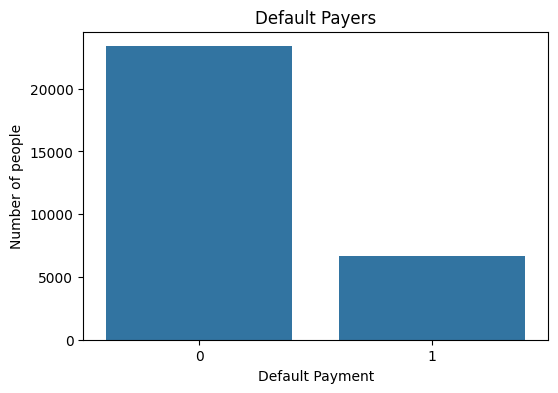

In [33]:
#bar plot
plt.figure(figsize=(6,4))
sns.barplot(x=default.index, y=default.values)
#plt.xticks(rotation=45)
plt.title('Default Payers')
plt.xlabel('Default Payment')
plt.ylabel('Number of people')
plt.show()

The percentage of defaulters in the data is 22.12 %


[]

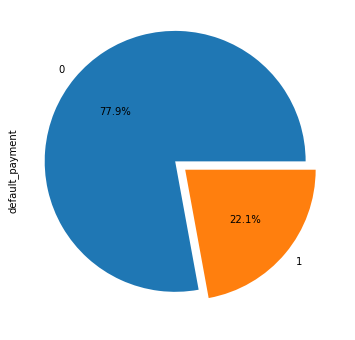

In [32]:
# How many defaulters
plt.figure(figsize=(8,6))
perc_default = df.default_payment.sum() / len(df.default_payment)
print(f'The percentage of defaulters in the data is {perc_default*100} %')
default.plot(kind='pie',explode=[0.1,0],autopct="%1.1f%%")
plt.plot()

In [34]:
# unbalanced dataset as people who are paying on time >> people who are default payers

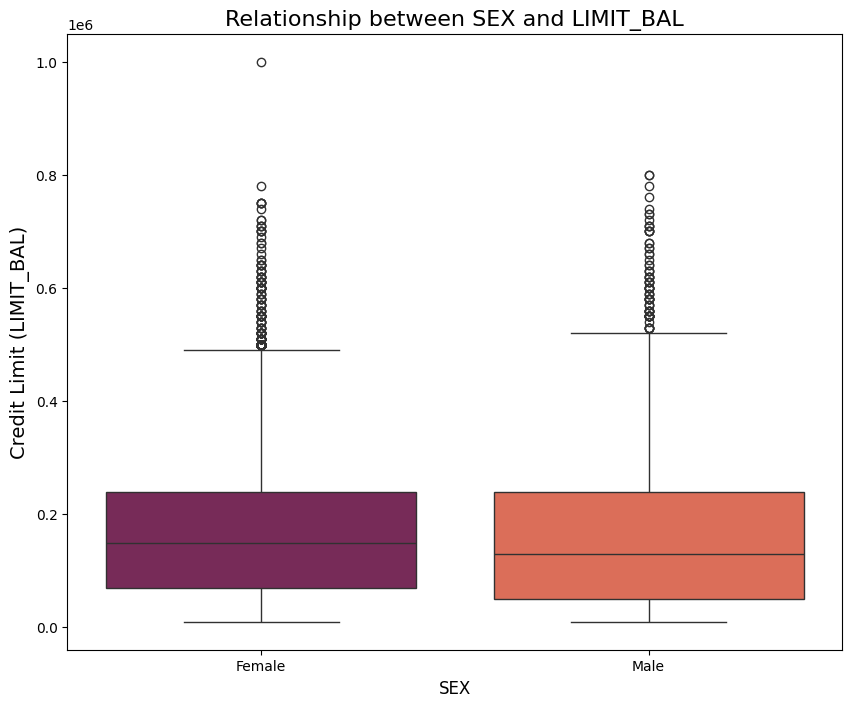

In [35]:
plt.figure(figsize=(10, 8))

# Plot the relationship using seaborn
sns.boxplot(data=df, x='SEX', y='LIMIT_BAL', hue='SEX', palette='rocket')

# Set the plot title and axis labels
plt.title('Relationship between SEX and LIMIT_BAL', fontsize=16)
plt.xlabel('SEX', fontsize=12)
plt.ylabel('Credit Limit (LIMIT_BAL)', fontsize=14)

# Display the plot
plt.show()

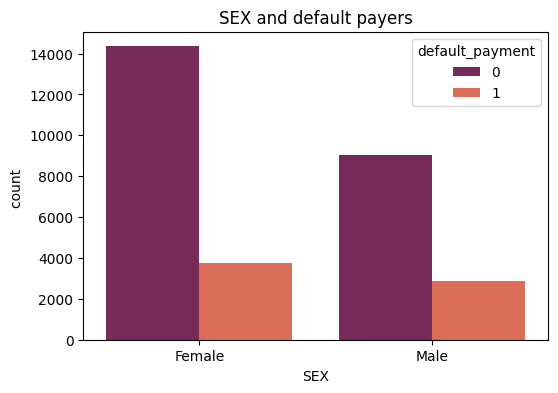

In [36]:
#count plot
palette = "rocket"
plt.figure(figsize=(6,4))
sns.countplot(x="SEX", hue="default_payment", data=df, palette=palette)
plt.title('SEX and default payers')
plt.xlabel('SEX')
plt.ylabel('count ')
plt.show()

In [37]:
#credit limit is balanced between both genders

In [38]:
defaulters = df.copy()
defaulters.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment
0,1,20000.0,Female,University,Married,24,2,2,0,0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,Female,University,Single,26,0,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,Female,University,Single,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,Female,University,Married,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,Male,University,Married,57,0,0,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


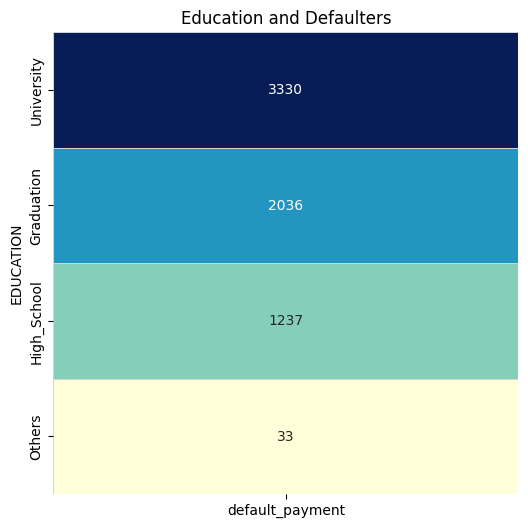

In [39]:
#Is there a connection between education and defaulters?

education = df[['EDUCATION', 'default_payment']].groupby(['EDUCATION'], axis=0).sum().sort_values('default_payment', ascending=False)

plt.figure(figsize=(6,6))
plt.title('Education and Defaulters')

sns.heatmap(education, annot=True, fmt='d', cmap='YlGnBu', cbar=False, linewidths=0.5, linecolor='lightgray')
plt.show()

In [40]:
edu=df['EDUCATION'].value_counts()
edu.index
default.index

Index([0, 1], dtype='int64', name='default_payment')

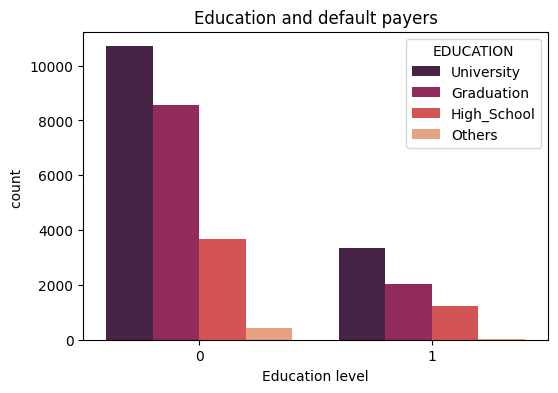

In [41]:
#count plot
palette = "rocket"
plt.figure(figsize=(6,4))
sns.countplot(x="default_payment", hue="EDUCATION", data=df, palette=palette)
plt.title('Education and default payers')
plt.xlabel('Education level')
plt.ylabel('count ')
plt.show()

In [42]:
#People of graduate school, university, and high school are highly close to making deault payment.


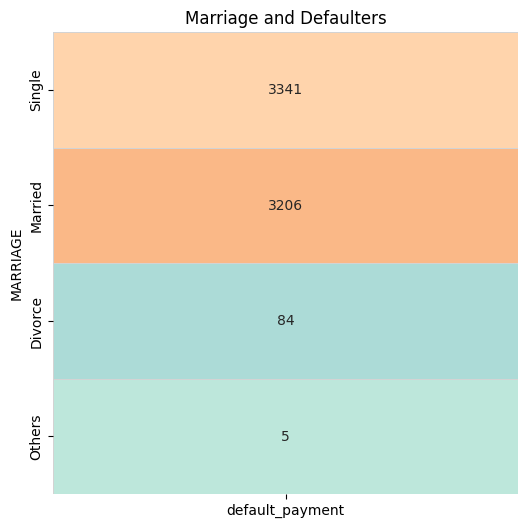

In [43]:
#Is there a connection between marriage and defaulters?

education = df[['MARRIAGE', 'default_payment']].groupby(['MARRIAGE'], axis=0).sum().sort_values('default_payment', ascending=False)

plt.figure(figsize=(6,6))
plt.title('Marriage and Defaulters')

sns.heatmap(education, annot=True, fmt='d', cmap='icefire', cbar=False, linewidths=0.5, linecolor='lightgray')
plt.show()

In [44]:
# single people are more likely to be defaulters acoording to this dataset 

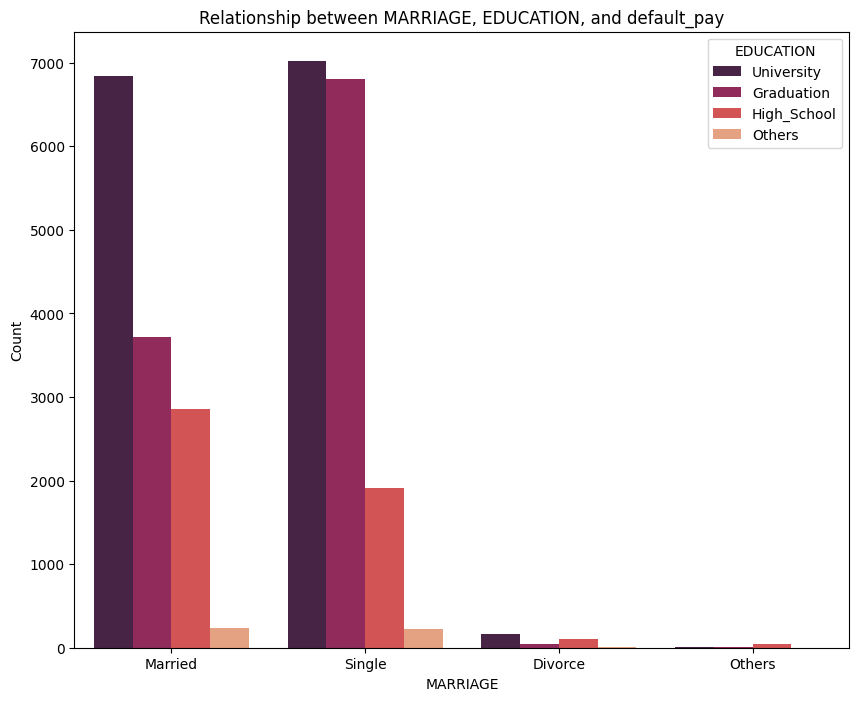

In [45]:
palette = "rocket"

# Plotting the relationship between variables
plt.figure(figsize=(10,8))
sns.countplot(x="MARRIAGE", hue="EDUCATION", data=defaulters, palette=palette)
plt.title("Relationship between MARRIAGE, EDUCATION, and default_pay")
plt.xlabel("MARRIAGE")
plt.ylabel("Count")

# Adjust the legend position
plt.legend(title="EDUCATION", loc="upper right")

plt.show()

In [46]:
#this shows that both graduate, university students defaul when they are married 
#this shows that  graduate, university,school students defaul when they are single 

In [47]:
defaulters.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment
0,1,20000.0,Female,University,Married,24,2,2,0,0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,Female,University,Single,26,0,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,Female,University,Single,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,Female,University,Married,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,Male,University,Married,57,0,0,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


<Axes: xlabel='AGE', ylabel='Count'>

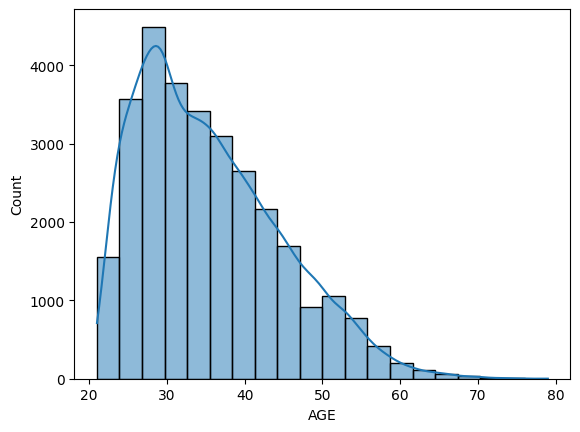

In [48]:
#histogram for relationship of age and defaulters
sns.histplot(df['AGE'],bins=20,kde=True)

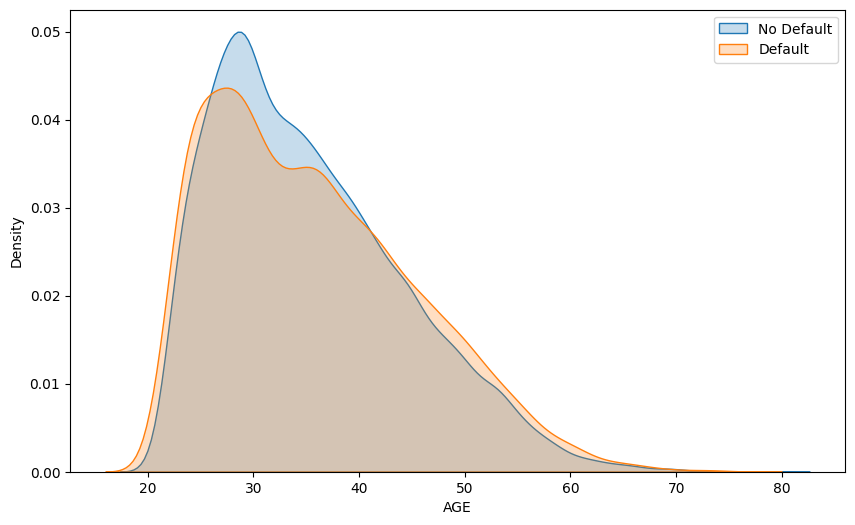

In [49]:
plt.figure(figsize=(10,6))

sns.kdeplot(df.loc[(df['default_payment'] == 0), 'AGE'], label = 'No Default', fill = True)
sns.kdeplot(df.loc[(df['default_payment'] == 1), 'AGE'], label = 'Default', fill = True)
plt.legend()
plt.show()

In [50]:
#we can clearly see that people between the age of 25-35 are defaulters

In [51]:
#Limit bal analysis

<Axes: xlabel='LIMIT_BAL', ylabel='Count'>

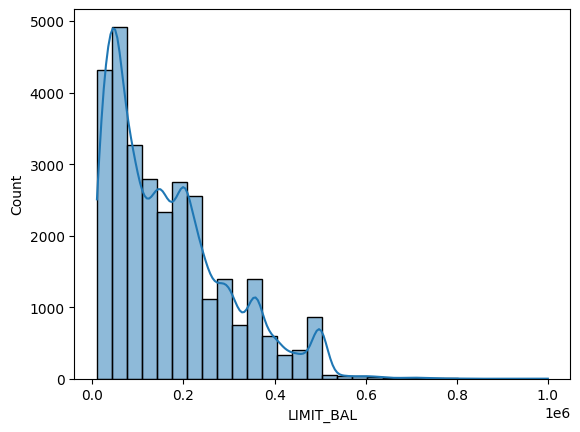

In [52]:
sns.histplot(df['LIMIT_BAL'],bins=30,kde=True)

In [53]:
df['LIMIT_BAL'].describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

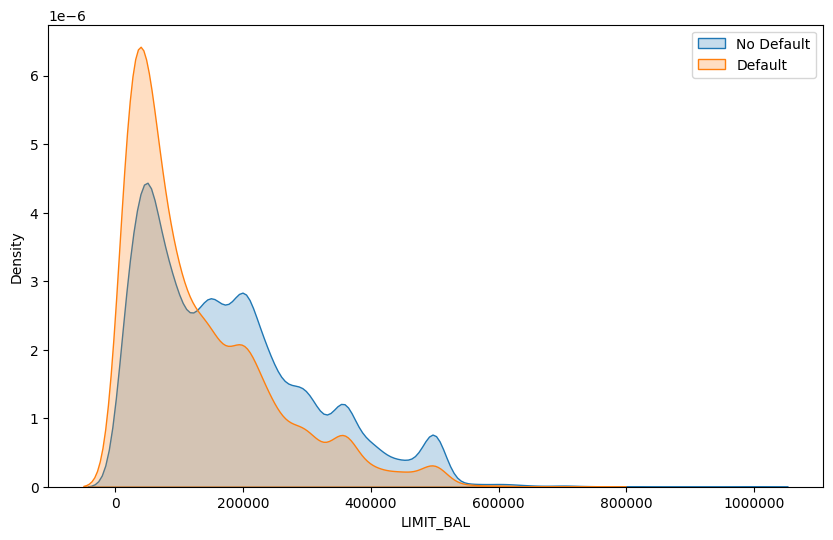

In [54]:
plt.figure(figsize=(10,6))

sns.kdeplot(df.loc[(df['default_payment'] == 0), 'LIMIT_BAL'], label = 'No Default', fill = True)
sns.kdeplot(df.loc[(df['default_payment'] == 1), 'LIMIT_BAL'], label = 'Default', fill = True)
plt.ticklabel_format(style='plain', axis='x') 
plt.legend()
plt.show()


In [55]:
#CORREALTION

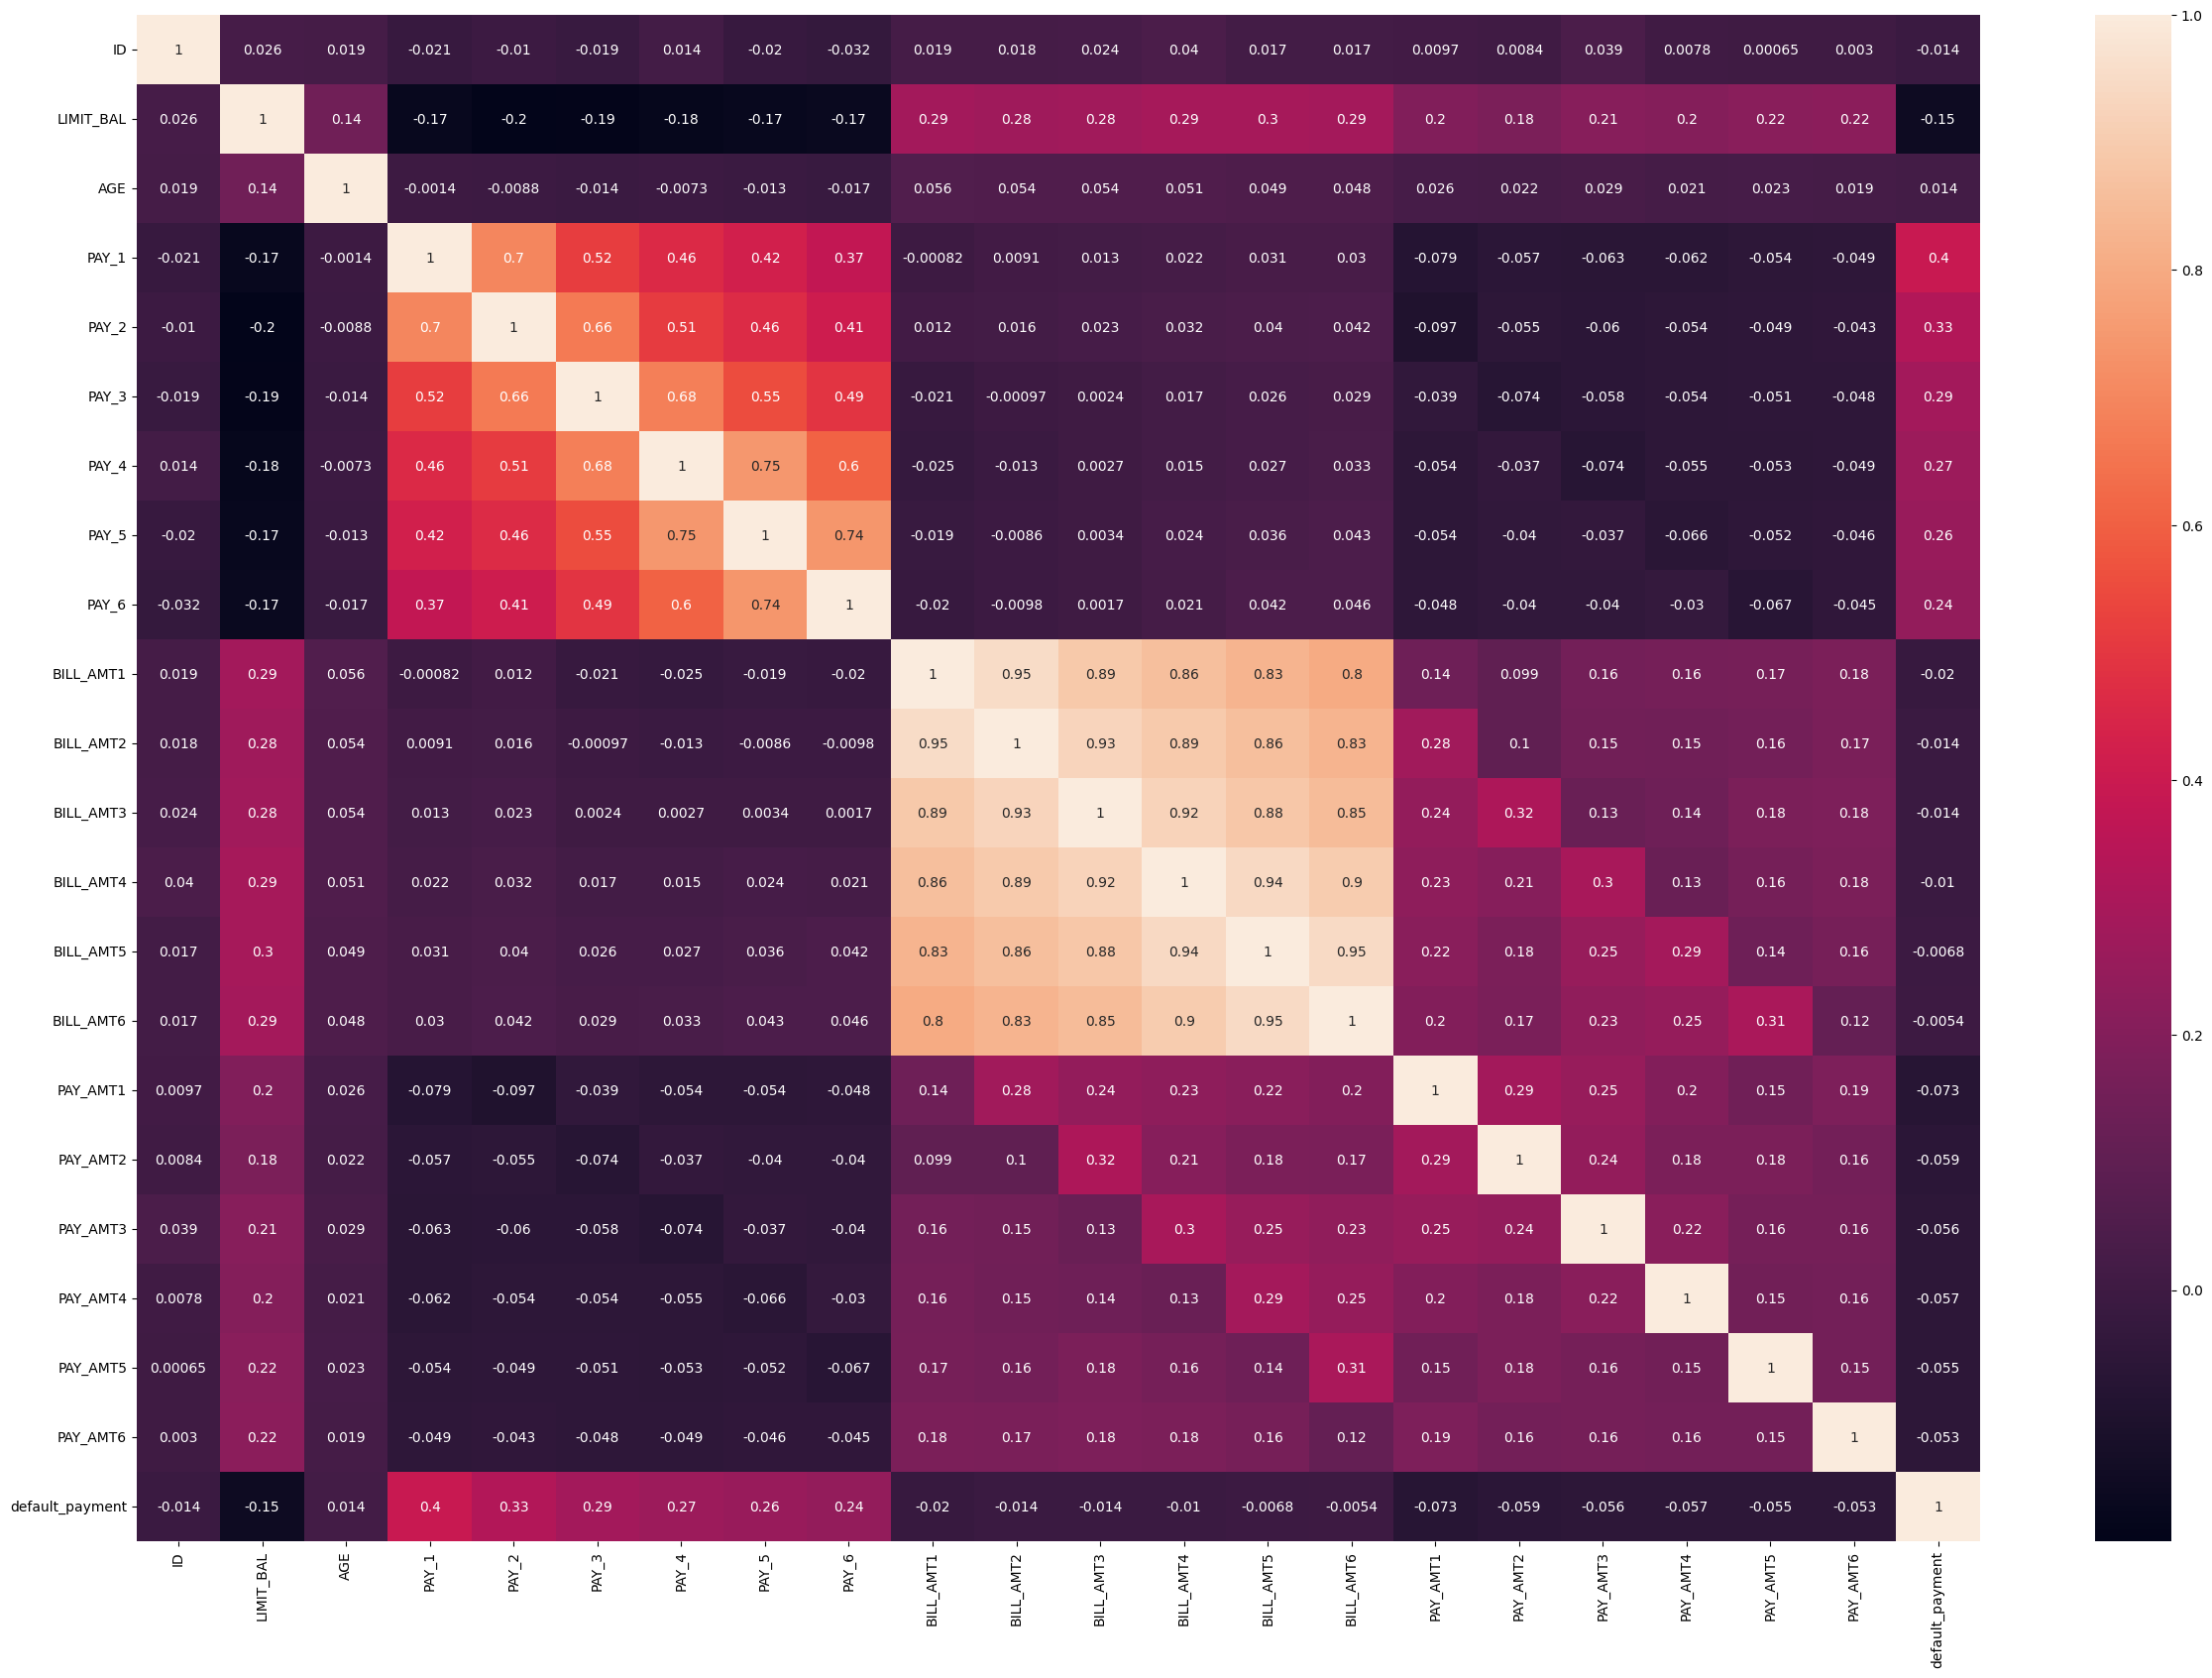

In [115]:
# Drop non-numeric columns
numeric_df = df.select_dtypes(include=[float, int])

plt.subplots(figsize=(30,20))
sns.heatmap(numeric_df.corr(), annot=True)
plt.show()

In [57]:
#creating a baseline model using logistic regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [58]:
original.rename(columns={'PAY_0':'PAY_1'}, inplace=True)

In [59]:
new_df=original.copy()

In [60]:
new_df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [61]:
new_df.rename(columns = {'default.payment.next.month':'default_payment'}, inplace=True)

In [62]:
new_df.loc[new_df.MARRIAGE == 0, 'MARRIAGE'] = 3
new_df.MARRIAGE.value_counts()

MARRIAGE
2    15964
1    13659
3      377
Name: count, dtype: int64

In [63]:
fil = (new_df.PAY_1 == -2) | (new_df.PAY_1 == -1) | (new_df.PAY_1 == 0)
new_df.loc[fil, 'PAY_1'] = 0
fil = (new_df.PAY_2 == -2) | (new_df.PAY_2 == -1) | (new_df.PAY_2 == 0)
new_df.loc[fil, 'PAY_2'] = 0
fil = (new_df.PAY_3 == -2) | (new_df.PAY_3 == -1) | (new_df.PAY_3 == 0)
new_df.loc[fil, 'PAY_3'] = 0
fil = (new_df.PAY_4 == -2) | (new_df.PAY_4 == -1) | (new_df.PAY_4 == 0)
new_df.loc[fil, 'PAY_4'] = 0
fil = (new_df.PAY_5 == -2) | (new_df.PAY_5 == -1) | (new_df.PAY_5 == 0)
new_df.loc[fil, 'PAY_5'] = 0
fil = (new_df.PAY_6 == -2) | (new_df.PAY_6 == -1) | (new_df.PAY_6 == 0)
new_df.loc[fil, 'PAY_6'] = 0

In [64]:
new_df['PAY_1'].value_counts()

PAY_1
0    23182
1     3688
2     2667
3      322
4       76
5       26
8       19
6       11
7        9
Name: count, dtype: int64

In [65]:
X = new_df.drop(['default_payment','ID'], axis=1)  
y = new_df['default_payment']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, stratify=y, random_state=2)

In [66]:
X_train

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
24350,50000.0,1,3,1,45,4,3,2,0,0,...,48268.0,49075.0,49475.0,48575.0,0.0,0.0,2000.0,1000.0,1000.0,2000.0
21018,10000.0,1,2,2,46,0,0,0,0,0,...,9319.0,18202.0,9287.0,0.0,1143.0,1218.0,1000.0,372.0,0.0,0.0
15916,20000.0,2,2,1,30,0,0,0,0,0,...,10419.0,780.0,0.0,0.0,1225.0,1015.0,780.0,0.0,0.0,0.0
18499,70000.0,2,5,1,26,0,0,0,0,0,...,70557.0,37209.0,28905.0,28455.0,2851.0,3500.0,1500.0,1300.0,1100.0,1000.0
7879,240000.0,2,2,1,44,0,0,0,2,0,...,238637.0,232995.0,206167.0,210100.0,9657.0,19253.0,0.0,7641.0,7522.0,7949.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26571,250000.0,2,3,1,53,1,0,0,0,0,...,839.0,0.0,1762.0,0.0,3836.0,839.0,0.0,1762.0,0.0,0.0
29872,230000.0,1,2,1,41,0,0,0,0,0,...,231272.0,228653.0,225471.0,224853.0,10000.0,10500.0,10000.0,9000.0,8200.0,9000.0
21692,100000.0,2,5,2,27,0,0,0,0,0,...,60734.0,48816.0,28679.0,30231.0,3000.0,2231.0,1617.0,1000.0,2000.0,590.0
7086,130000.0,1,3,1,38,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [67]:
y_train

24350    1
21018    0
15916    1
18499    0
7879     0
        ..
26571    0
29872    0
21692    0
7086     0
22624    0
Name: default_payment, Length: 24000, dtype: int64

In [110]:
LR = LogisticRegression()
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)
print('Accuracy:', accuracy_score(y_pred,y_test))

cv_scores = cross_val_score(LR, X, y, cv=10)
print()
print(classification_report(y_test, y_pred))
print()
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))



C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.7788333333333334


C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht


              precision    recall  f1-score   support

           0       0.78      1.00      0.88      4673
           1       0.00      0.00      0.00      1327

    accuracy                           0.78      6000
   macro avg       0.39      0.50      0.44      6000
weighted avg       0.61      0.78      0.68      6000


Average 5-Fold CV Score: 0.7787 , Standard deviation: 0.0002


C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision 

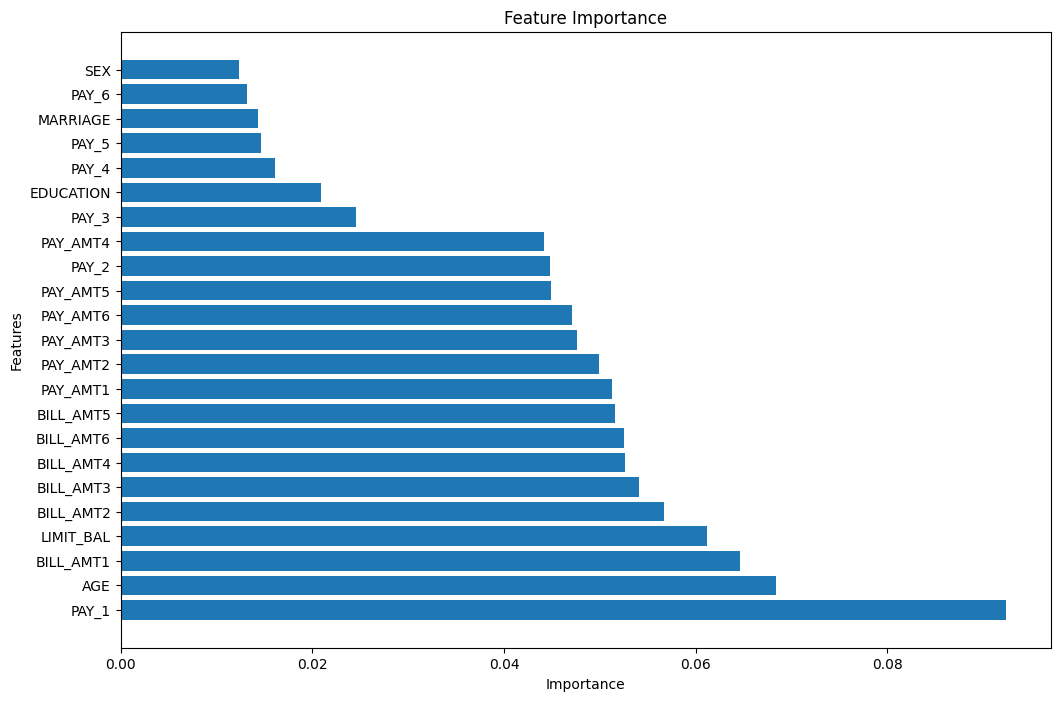

In [69]:

P = new_df.drop(['default_payment','ID'], axis=1)  
q = new_df['default_payment']
# Initializing the Random Forest classifier
rf = RandomForestClassifier()
rf.fit(P, q)
importances = rf.feature_importances_

feature_importances = pd.DataFrame({'Features': P.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values('Importance', ascending=False)

# Plotting the feature importances
plt.figure(figsize=(12, 8))
plt.barh(feature_importances['Features'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()

In [70]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [72]:
transformer = ColumnTransformer(transformers=[
    ('tnf1',OneHotEncoder(),['SEX','EDUCATION','MARRIAGE'])
],remainder='passthrough')

In [73]:
X_train_transform=transformer.fit_transform(X_train)

In [74]:
X_train_transform.shape

(24000, 32)

In [75]:
X_test_transform=transformer.transform(X_test)

In [76]:
X_train.shape

(24000, 23)

In [77]:
new_df[['SEX','MARRIAGE','EDUCATION']] = new_df[['SEX','MARRIAGE','EDUCATION']].astype('object')

#One Hot encoding
final_df = pd.get_dummies(new_df)
final_df.head()

,ID,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,EDUCATION_0,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,1,20000.0,24,2,2,0,0,0,0,3913.0,...,False,False,True,False,False,False,False,True,False,False
1,2,120000.0,26,0,2,0,0,0,2,2682.0,...,False,False,True,False,False,False,False,False,True,False
2,3,90000.0,34,0,0,0,0,0,0,29239.0,...,False,False,True,False,False,False,False,False,True,False
3,4,50000.0,37,0,0,0,0,0,0,46990.0,...,False,False,True,False,False,False,False,True,False,False
4,5,50000.0,57,0,0,0,0,0,0,8617.0,...,False,False,True,False,False,False,False,True,False,False


In [76]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 34 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               30000 non-null  int64  
 1   LIMIT_BAL        30000 non-null  float64
 2   AGE              30000 non-null  int64  
 3   PAY_1            30000 non-null  int64  
 4   PAY_2            30000 non-null  int64  
 5   PAY_3            30000 non-null  int64  
 6   PAY_4            30000 non-null  int64  
 7   PAY_5            30000 non-null  int64  
 8   PAY_6            30000 non-null  int64  
 9   BILL_AMT1        30000 non-null  float64
 10  BILL_AMT2        30000 non-null  float64
 11  BILL_AMT3        30000 non-null  float64
 12  BILL_AMT4        30000 non-null  float64
 13  BILL_AMT5        30000 non-null  float64
 14  BILL_AMT6        30000 non-null  float64
 15  PAY_AMT1         30000 non-null  float64
 16  PAY_AMT2         30000 non-null  float64
 17  PAY_AMT3    

In [78]:
X = final_df.drop(['default_payment','ID'], axis=1)  
y = final_df['default_payment']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, stratify=y, random_state=2)

In [79]:
#Using DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [80]:
dt_pred = dt.predict(X_test)

In [81]:
dt_accuracy = accuracy_score(y_test, dt_pred)


In [82]:
dt_accuracy

0.7205

In [83]:
#Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred=rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print(rf_accuracy)

0.8176666666666667


In [84]:
#XGB Classifier
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X_train,y_train)
xgb_pred = xgb_classifier.predict(X_test)

xgb_classifier_accuracy = accuracy_score(y_test, xgb_pred)
print(xgb_classifier_accuracy)

0.8181666666666667


In [85]:
#using logistic regression
LR.fit(X_train,y_train)
LR_pred=LR.predict(X_test)
LR_accuracy=accuracy_score(y_test,LR_pred)
print(LR_accuracy)

0.7788333333333334


C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [85]:
print(classification_report(y_test, dt_pred))
print(classification_report(y_test, rf_pred))
print(classification_report(y_test, LR_pred))
print(classification_report(y_test, xgb_pred))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82      4673
           1       0.39      0.43      0.41      1327

    accuracy                           0.73      6000
   macro avg       0.61      0.62      0.62      6000
weighted avg       0.74      0.73      0.73      6000

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4673
           1       0.65      0.38      0.48      1327

    accuracy                           0.82      6000
   macro avg       0.75      0.66      0.69      6000
weighted avg       0.80      0.82      0.80      6000

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      4673
           1       0.00      0.00      0.00      1327

    accuracy                           0.78      6000
   macro avg       0.39      0.50      0.44      6000
weighted avg       0.61      0.78      0.68      6000

              preci

C:\Users\archi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\archi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\archi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [86]:
#We observe that even after one hot encoding of our data logistic regression still gives same accuracy
#We are getting less accuracy because the data is unbalanced 
#We will have to use SMOTE so that we can improve accuracy of our model
#This is important as our dataset is very imbalanced

In [87]:
new_df['default_payment'].value_counts()

default_payment
0    23364
1     6636
Name: count, dtype: int64

In [88]:
final_df

,ID,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,EDUCATION_0,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,1,20000.0,24,2,2,0,0,0,0,3913.0,...,False,False,True,False,False,False,False,True,False,False
1,2,120000.0,26,0,2,0,0,0,2,2682.0,...,False,False,True,False,False,False,False,False,True,False
2,3,90000.0,34,0,0,0,0,0,0,29239.0,...,False,False,True,False,False,False,False,False,True,False
3,4,50000.0,37,0,0,0,0,0,0,46990.0,...,False,False,True,False,False,False,False,True,False,False
4,5,50000.0,57,0,0,0,0,0,0,8617.0,...,False,False,True,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,39,0,0,0,0,0,0,188948.0,...,False,False,False,True,False,False,False,True,False,False
29996,29997,150000.0,43,0,0,0,0,0,0,1683.0,...,False,False,False,True,False,False,False,False,True,False
29997,29998,30000.0,37,4,3,2,0,0,0,3565.0,...,False,False,True,False,False,False,False,False,True,False
29998,29999,80000.0,41,1,0,0,0,0,0,-1645.0,...,False,False,False,True,False,False,False,True,False,False


In [89]:
#using SMOTE

smote = SMOTE(random_state=2)
X_smote, y_smote = smote.fit_resample(X_train,y_train)

X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, test_size=0.2, random_state=22)

In [90]:
from collections import Counter

In [91]:
print("Before using smote:", Counter(y_train))
print("After using smote:", Counter(y_train_smote))

Before using smote: Counter({0: 18691, 1: 5309})
After using smote: Counter({1: 14989, 0: 14916})


In [92]:
#Now we use the machine learning algorithms on SMOTE data which is balanced

In [93]:
#Using DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train_smote, y_train_smote)
dt_pred_smote = dt.predict(X_test_smote)
dt_accuracy_smote = accuracy_score(y_test_smote, dt_pred_smote)
dt_accuracy_smote

0.8032633409121306

In [94]:
#Random Forest
rf.fit(X_train_smote, y_train_smote)
rf_pred_smote=rf.predict(X_test_smote)
rf_accuracy_smote = accuracy_score(y_test_smote, rf_pred_smote)
print(rf_accuracy_smote)

0.8790958940751639


In [95]:
#After SMOTE RandomForest performs better

In [96]:
print(classification_report(y_test_smote, rf_pred_smote))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88      3775
           1       0.91      0.84      0.87      3702

    accuracy                           0.88      7477
   macro avg       0.88      0.88      0.88      7477
weighted avg       0.88      0.88      0.88      7477



In [97]:
#XGB Classifier
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X_train_smote,y_train_smote)
xgb_pred_smote = xgb_classifier.predict(X_test_smote)

xgb_accuracy_smote = accuracy_score(y_test_smote, xgb_pred_smote)
print(xgb_accuracy_smote)

0.8647853417145914


In [99]:
#using logistic regression
LR.fit(X_train_smote,y_train_smote)
LR_pred_smote=LR.predict(X_test_smote)

C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [100]:
LR_accuracy_smote = accuracy_score(y_test_smote, LR_pred_smote)
print(LR_accuracy_smote)

0.600374481744015


In [101]:
#After SMOTE Logistic Regression performs worse

In [102]:
print(classification_report(y_test_smote, dt_pred_smote))
print(classification_report(y_test_smote, rf_pred_smote))
print(classification_report(y_test_smote, LR_pred_smote))
print(classification_report(y_test_smote, xgb_pred_smote))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80      3775
           1       0.79      0.82      0.80      3702

    accuracy                           0.80      7477
   macro avg       0.80      0.80      0.80      7477
weighted avg       0.80      0.80      0.80      7477

              precision    recall  f1-score   support

           0       0.85      0.92      0.88      3775
           1       0.91      0.84      0.87      3702

    accuracy                           0.88      7477
   macro avg       0.88      0.88      0.88      7477
weighted avg       0.88      0.88      0.88      7477

              precision    recall  f1-score   support

           0       0.58      0.75      0.65      3775
           1       0.64      0.45      0.53      3702

    accuracy                           0.60      7477
   macro avg       0.61      0.60      0.59      7477
weighted avg       0.61      0.60      0.59      7477

              preci

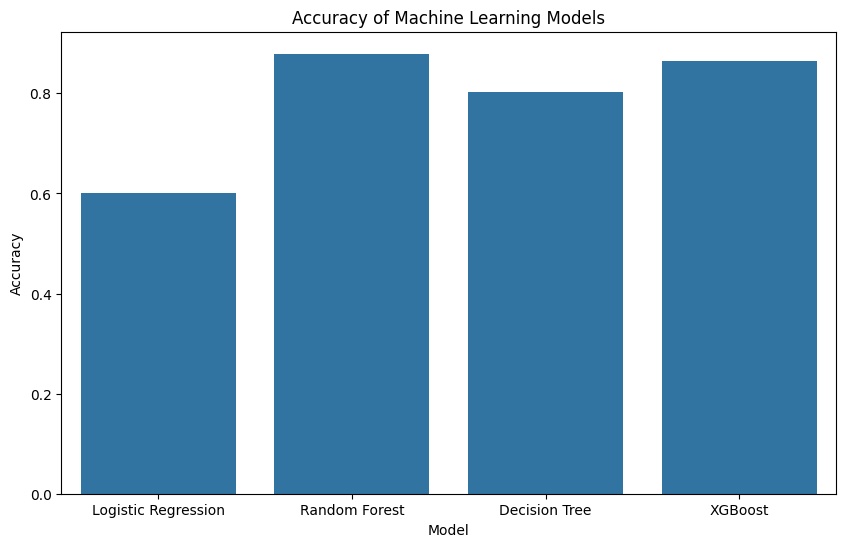

In [103]:
# Plotting the accuracies
data = {'Logistic Regression':LR_accuracy_smote, 'Random Forest':rf_accuracy_smote, 'Decision Tree':dt_accuracy_smote,'XGBoost':xgb_accuracy_smote}
models = list(data.keys())
accuracies = list(data.values())
plt.figure(figsize=(10,6))
sns.barplot(x=models, y=accuracies)
plt.title('Accuracy of Machine Learning Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()

In [104]:
#We can easily see using the bar plot that the accuracy of Random Forest algorithm is the highest at 87%

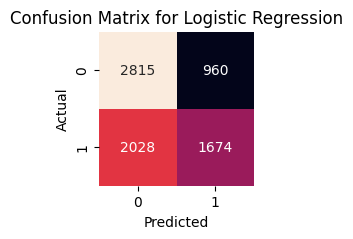

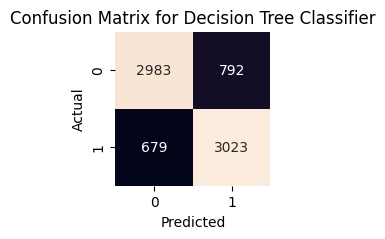

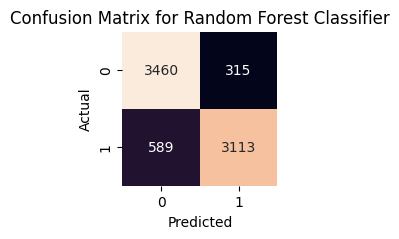

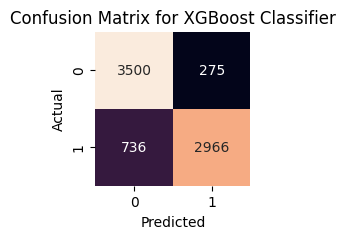

In [105]:
def plot_confusion_matrix(y_true, y_pred, labels, model_name):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    plt.figure(figsize=(2,2))
    sns.heatmap(cm, annot=True, fmt='d', cmap='rocket', cbar=False)
    plt.title('Confusion Matrix for ' + model_name)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.xticks(ticks=np.arange(len(labels))+0.5, labels=labels)
    plt.yticks(ticks=np.arange(len(labels))+0.5, labels=labels)
    plt.show()

# Plotting the confusion matrix and classification report for each model
plot_confusion_matrix(y_test_smote, LR_pred_smote, labels=[0, 1], model_name = "Logistic Regression")
plot_confusion_matrix(y_test_smote, dt_pred_smote, labels=[0, 1], model_name = "Decision Tree Classifier")
plot_confusion_matrix(y_test_smote, rf_pred_smote, labels=[0, 1], model_name = "Random Forest Classifier")
plot_confusion_matrix(y_test_smote, xgb_pred_smote, labels=[0, 1], model_name = "XGBoost Classifier")

In [106]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier=RandomForestClassifier(n_estimators=10).fit(X_train_smote,y_train_smote)
prediction=rf_classifier.predict(X_test_smote)

In [107]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test_smote,prediction))
print(accuracy_score(y_test_smote,prediction))
print(classification_report(y_test_smote,prediction))

[[3437  338]
 [ 691 3011]]
0.8623779590744951
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      3775
           1       0.90      0.81      0.85      3702

    accuracy                           0.86      7477
   macro avg       0.87      0.86      0.86      7477
weighted avg       0.87      0.86      0.86      7477



In [108]:
!pip install tpot

Defaulting to user installation because normal site-packages is not writeable
  Using cached TPOT-0.12.2-py3-none-any.whl.metadata (2.0 kB)
  Using cached deap-1.4.1-py3-none-any.whl
  Using cached update_checker-0.18.0-py3-none-any.whl.metadata (2.3 kB)
     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     ---------------------------------------- 57.6/57.6 kB 3.2 MB/s eta 0:00:00
  Using cached stopit-1.1.2-py3-none-any.whl
Using cached TPOT-0.12.2-py3-none-any.whl (87 kB)
   ---------------------------------------- 0.0/78.4 kB ? eta -:--:--
   ---------------------------------------- 78.4/78.4 kB 4.3 MB/s eta 0:00:00
Using cached update_checker-0.18.0-py3-none-any.whl (7.0 kB)



[notice] A new release of pip is available: 23.3.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [114]:
from tpot import TPOTClassifier

X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)
param = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
tpot_classifier = TPOTClassifier(
    generations=5,
    population_size=24,
    offspring_size=12,
    verbosity=2,
    early_stop=12,
    config_dict={'sklearn.ensemble.RandomForestClassifier': param},  # Passing param for RandomForestClassifier
    cv=4,
    scoring='accuracy'
)
tpot_classifier.fit(X_train_smote,y_train_smote)

Optimization Progress:   0%|          | 0/84 [00:00<?, ?pipeline/s]



TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: RandomForestClassifier(input_matrix, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100)


TPOTClassifier(config_dict={'sklearn.ensemble.RandomForestClassifier': {'max_depth': [10,
                                                                                      20],
                                                                        'min_samples_leaf': [1,
                                                                                             2],
                                                                        'min_samples_split': [2,
                                                                                              5],
                                                                        'n_estimators': [100,
                                                                                         200]}},
               cv=4, early_stop=12, generations=5, offspring_size=12,
               population_size=24, scoring='accuracy', verbosity=2)